### Capstone I - NHANES Data Storytelling

The goal of this project is to identify ways to predict, and therefore prevent, hospital readmissions, with a focus on patients with cardiovascular disease. We will investigate risk factors for individuals with hospital stays of greater than 1 night, based on data from the Centers for Disease Control and Preventions National Health and Nutrition Examination Survey (NHANES) from 2015-2016. For the data storytelling portion of the project, some of the questions we will be asking include:

-	How does number of hospital stays differ between people of different ethnicities?
-	How does number of hospital stays differ between people with different food security?
-	Is there a relationship between blood lab levels and number of hospital nights?
-	Is there a relationship between CVD overall and number of hospital stays?
-	Does the depression score have an impact number of hospital stays?
-	Is there a relationship between people with cardiovascular disease (CVD) and depression (or other variables) and # hospital stays?
        
2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

3. Can you make a bar plot or a histogram?

4. Can you compare two related quantities?

5. Can you make a scatterplot?


Looking at the plots, what are some insights you can make? 

8. Do you see any correlations? 

9. Is there a hypothesis you’d like to investigate further? 

10. What other questions do the insights lead you to ask?


Now that you’ve asked questions, hopefully you’ve found some interesting insights.
11. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 

12. What are some other trends/relationships you think will make the story more complete?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading in the data.

In [2]:
nhanes = pd.read_csv('nhanes.csv')


In [3]:
pd.set_option('display.max_columns',50)
nhanes.head()

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,foodsec,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,depr_score,diabetes,diabetes_age,prediabetes,chf,chf_age,chd,chd_age,angina,angina_age,heartattack,heartattack_age,stroke,stroke_age,cvd_onset_age,glucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,numhosp
0,83732.0,62.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,173.0,7.0,27.8,NaN,NaN
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,101.0,63.0,147.0,173.0,265.0,5.5,30.8,30.0,NaN
2,83734.0,78.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,52.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,58.0,0.0,NaN,58.0,84.0,30.0,269.0,145.0,229.0,5.8,28.8,NaN,NaN
3,83735.0,56.0,1.0,white,NaN,1.0,NaN,3.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,13.0,0.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,61.0,NaN,NaN,174.0,5.6,42.4,50.9,NaN
4,83736.0,42.0,1.0,black,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,84.0,53.0,47.0,142.0,204.0,5.6,20.3,NaN,NaN


#### During the data cleaning phase, we identified approximately 40 variables of interest from the 2015-2016 NHANES dataset, including: 
Demographic Information:
Age,
Gender,
Ethnicity,
Language, 
Food Security

Presence of Disease and Age of onset:
Diabetes and Diabetes age of onset,
Prediabetes,
Congestive Heart Failure and Age of onset,
Depression Screening Results (set of 10 questions and overall score),
Coronary Heart Disease and Age of onset,
Angina/Angina Pectoris and Age of onset,
Heart Attack and Age of onset,
Stroke and Age of onset,
Age of Onset of Cardiovascular disease (based on earliest Age of Onset of the 5 types of CVD examined in the dataset)

Blood Laboratory Values
Fasting blood glucose,
Hemoglobin A1C,
Total Cholesterol,
LDL Cholesterol,
HDL Cholesterol,
Fasting Triglycerides,

Physical Measurements (calculated):
Body Mass Index,
Percent Body Fat

Hospital Admission Information:
Hospital stays (total number stays of 1 night or more) in the last year



In [4]:
print(nhanes.shape)
print(nhanes.info())


(5992, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 42 columns):
seqn               5992 non-null float64
age                5992 non-null float64
gender             5992 non-null float64
ethnicity          5992 non-null object
lang_hisp          1851 non-null object
lang_nhb_nhw       3294 non-null float64
lang_asian         723 non-null object
foodsec            5766 non-null float64
depr1              5151 non-null float64
depr2              5161 non-null float64
depr3              5161 non-null float64
depr4              5161 non-null float64
depr5              5158 non-null float64
depr6              5159 non-null float64
depr7              5159 non-null float64
depr8              5158 non-null float64
depr9              5157 non-null float64
depr10             3577 non-null float64
depr_score         3559 non-null float64
diabetes           5988 non-null float64
diabetes_age       830 non-null float64
prediabetes        5005 no

#### The overall objective of this project is to identify ways to reduce number of hospital readmissions related to new onset cardiovascular disease(CVD). 
Here, we create a column that indicates whether participants had onset of CVD during the year of the study. Next, we create a subset of the nhanes data ('newcvd') that included only these participants.

In [5]:
# Creating column indicating participants with onset of cvd at their current age at time of the study
nhanes['new_cvd'] = nhanes['cvd_onset_age'] == nhanes['age']
nhanes['new_cvd']
print(nhanes['new_cvd'].value_counts())

# creating sample dataset with only new_cvd participants
newcvd = nhanes.loc[nhanes['new_cvd']==True]
newcvd.info()

False    5929
True       63
Name: new_cvd, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 36 to 5939
Data columns (total 43 columns):
seqn               63 non-null float64
age                63 non-null float64
gender             63 non-null float64
ethnicity          63 non-null object
lang_hisp          12 non-null object
lang_nhb_nhw       43 non-null float64
lang_asian         5 non-null object
foodsec            62 non-null float64
depr1              47 non-null float64
depr2              48 non-null float64
depr3              48 non-null float64
depr4              48 non-null float64
depr5              48 non-null float64
depr6              48 non-null float64
depr7              48 non-null float64
depr8              48 non-null float64
depr9              48 non-null float64
depr10             35 non-null float64
depr_score         35 non-null float64
diabetes           63 non-null float64
diabetes_age       19 non-null float64
prediabetes        42 n

#### Number of Hospital Stays in the Last Year - Initial Exploration

There are 670 and 38 entries for hospital stays of 1 or more night from the entire 'nhanes' dataset and the 'newcvd' data subset, respectively. To examine the frequency of 'number of hospital stays' in the given year, we  create a histogram of both datasets. As a reminder, participants who had hospital stays (1 night or more) selected: 1 stay, 2 stays, 3 stays, 4 stays, 5 stays, 6 or more stays.


The totals for number of hospital stays of 1 to 6 or more nights, over the entire dataset:
 1.0    466
2.0    120
3.0     49
4.0     14
5.0     13
6.0      8
Name: numhosp, dtype: int64
The totals for number of hospital stays of 1 to 6 or more nights for participants with cardiovascular disease:
 1.0    24
3.0     6
2.0     5
5.0     2
4.0     1
Name: numhosp, dtype: int64


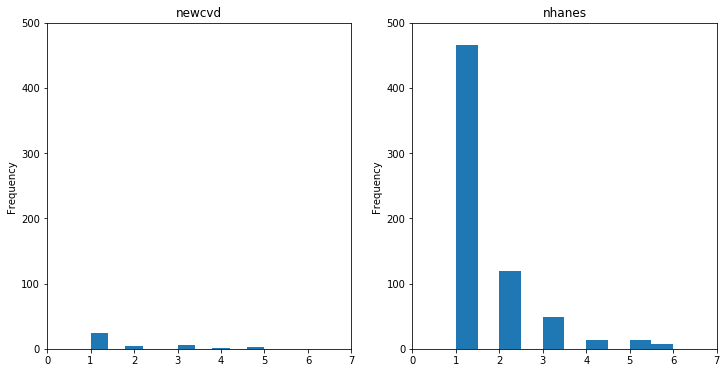

The median number of hospital stays for the newcvd group was:  1.0
The median number of hospital stays for the overall nhanes group was:  1.0


In [39]:
print('The totals for number of hospital stays of 1 to 6 or more nights, over the entire dataset:\n', nhanes.numhosp.value_counts())

print('The totals for number of hospital stays of 1 to 6 or more nights for participants with cardiovascular disease:\n', newcvd.numhosp.value_counts())

f, axs = plt.subplots(2,2,figsize=(12,6))
plt.subplot(1,2,1)
newcvd.numhosp.plot(kind='hist', title='newcvd')
plt.ylim(0,500)
plt.xlim(0,7)

plt.subplot(1,2,2)
nhanes.numhosp.plot(kind='hist', title='nhanes')
plt.ylim(0,500)
plt.xlim(0,7)
plt.show()
print('The median number of hospital stays for the newcvd group was: ', newcvd.numhosp.median())
print('The median number of hospital stays for the overall nhanes group was: ', nhanes.numhosp.median())


The median hospital stays of both the new onset cvd and nhanes were both  1 hospital stay, as would be expected. To further examine the frequency data, we'll group together '2, 3, 4, 5, and 6' selections for numhosp, and compare the percent of stays between the nhanes and newcvd subset. 

In [7]:
cvd_over1 = newcvd.loc[newcvd.numhosp>1]
cvd_over1_total=cvd_over1.numhosp.value_counts().sum()
cvd_allstays = newcvd.numhosp.value_counts().sum()
cvd_percent_over1 = (cvd_over1_total/cvd_allstays * 100).round(1)
print('For the new onset CVD subset, ', cvd_percent_over1, '% of participants had 2 or more hospital stays.')
print(' Median - readmissions for new onset CVD participants who had a hospital stay: ', cvd_over1.numhosp.median(),'\n')

nhanes_over1 = nhanes.loc[nhanes.numhosp>1]
nhanes_over1_total=nhanes_over1.numhosp.value_counts().sum()
nhanes_allstays = nhanes.numhosp.value_counts().sum()
nhanes_percent_over1 = (nhanes_over1_total/nhanes_allstays * 100).round(1)
print('For the overall NHANES dataset, ', nhanes_percent_over1, '% of participants had 2 or more hospital stays.')

print(' Median - readmissions for overall nhanes participants who had a hospital stay: ', nhanes_over1.numhosp.median(),'\n')

For the new onset CVD subset,  36.8 % of participants had 2 or more hospital stays.
 Median - readmissions for new onset CVD participants who had a hospital stay:  3.0 

For the overall NHANES dataset,  30.4 % of participants had 2 or more hospital stays.
 Median - readmissions for overall nhanes participants who had a hospital stay:  2.0 



#### One or more hospital readmissions are more common with new onset CVD, when compared with hospital readmissions for the general population.


Next, we will examine other factors that could affect number of hospital admissions.

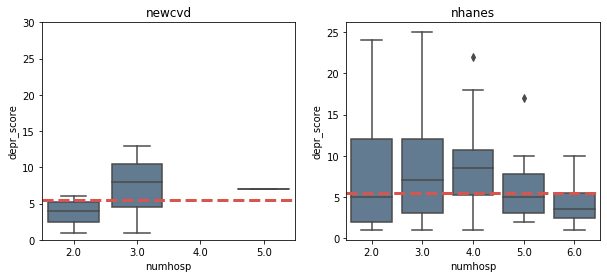

median depression score for newcvd(2 or more hospital admissions):  5.5
median depression score for newcvd(1 or more hospital admissions):  5.0
median depression score for nhanes (2 or more hospital admissions):  6.0
median depression score for nhanes (1 or more hospital admissions):  3.0


In [45]:
#Depression Score

f, axs = plt.subplots(2,2,figsize=(10,4))
color=sns.xkcd_rgb["slate blue"]

plt.subplot(1,2,1)
sns.boxplot(data = cvd_over1, x='numhosp', y='depr_score', color=color)
plt.title('newcvd')
xmed=cvd_over1.depr_score.median()
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [xmed], sns.xkcd_rgb["pale red"],linestyle='--', linewidth='3')
plt.ylim(0,30)
plt.subplot(1,2,2)
sns.boxplot(data=nhanes_over1, x='numhosp', y='depr_score', color=color)
plt.title('nhanes')
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [xmed], sns.xkcd_rgb["pale red"], linestyle='--', linewidth='3')
plt.show()
print('median depression score for newcvd(2 or more hospital admissions): ', cvd_over1.depr_score.median() )
print('median depression score for newcvd(1 or more hospital admissions): ', newcvd.depr_score.median())

print('median depression score for nhanes (2 or more hospital admissions): ' , nhanes_over1.depr_score.median())
print('median depression score for nhanes (1 or more hospital admissions): ' , nhanes.depr_score.median())


#### Interestingly, but also not surprisingly, for 2 or more hospital stays, median depression score is about the same for newcvd  and nhanes.  However, for 1 or more hospital stays, There appears to be a significant difference between the nhanes and newcvd.

Continuing to explore some of the other features of the dataset and their relationship to number of hospital readmissions, we will look at possible relationships between number of admission and participant ethnicity.

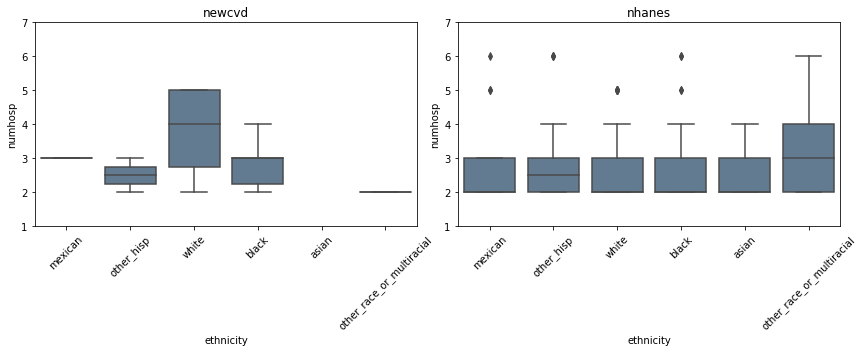

In [41]:
#number of hospital stays by ethnicity
f, axs = plt.subplots(2,2,figsize=(12,5))
color=sns.xkcd_rgb["slate blue"]


plt.subplot(1,2,1)
plt.title('newcvd')
plt.xticks(rotation=45)
plt.ylim(1,7)
plt.tight_layout()
sns.boxplot(data= cvd_over1, x='ethnicity', y='numhosp', color=color, order=('mexican','other_hisp', 'white', 'black', 'asian', 'other_race_or_multiracial'))
plt.subplot(1,2,2)
plt.title('nhanes')
plt.ylim(1,7)
plt.xticks(rotation=45)
plt.tight_layout()
sns.boxplot(data= nhanes_over1, x='ethnicity', y='numhosp', color=color, order=('mexican', 'other_hisp', 'white', 'black', 'asian', 'other_race_or_multiracial'))
plt.show()


#### In regard to ethnicity, the number of hospital stays for those who identified as non-hispanic Black is higher in the new onset CVD subset.

Next, we will examine percentage of individuals that are Black in the subset vs the full dataset to get a better picture.


In [46]:
cvd_black = cvd_over1.loc[newcvd.ethnicity == 'black']
cvd_black_total=cvd_black.ethnicity.value_counts().sum()
cvd_all_ethnicities = cvd_over1.ethnicity.value_counts().sum()
cvd_percent_black = (cvd_black_total/cvd_all_ethnicities * 100).round(1)
print('For the new onset CVD subset, ', cvd_percent_black, '% of participants identified as Black.')
print(' Median - number of admissions for Black ethnicity new onset CVD participants who had 2 or more hospital stays: ', cvd_black.numhosp.median(),'\n')

cvd_white = cvd_over1.loc[newcvd.ethnicity == 'white']
cvd_white_total=cvd_white.ethnicity.value_counts().sum()
cvd_all_ethnicities = cvd_over1.ethnicity.value_counts().sum()
cvd_percent_white = (cvd_white_total/cvd_all_ethnicities * 100).round(1)
print('For the new onset CVD subset, ', cvd_percent_white, '% of participants identified as White.')
print(' Median - number of admissions for White ethnicity new onset CVD participants who had 2 or more hospital stays: ', cvd_white.numhosp.median(),'\n')


nhanes_black = nhanes_over1.loc[nhanes.ethnicity == 'black']
nhanes_black_total=nhanes_black.ethnicity.value_counts().sum()
nhanes_all_ethnicities = nhanes_over1.ethnicity.value_counts().sum()
nhanes_percent_black = (nhanes_black_total/nhanes_all_ethnicities * 100).round(1)
print('For nhanes ', nhanes_percent_black, ' % of participants identified as Black.')
print(' Median - number of admissions for Black ethnicity NHANES participants who had 2 or more hospital stays: ', nhanes_black.numhosp.median(),'\n')

nhanes_white = nhanes_over1.loc[nhanes.ethnicity == 'white']
nhanes_white_total=nhanes_white.ethnicity.value_counts().sum()
nhanes_all_ethnicities = nhanes_over1.ethnicity.value_counts().sum()
nhanes_percent_white = (nhanes_white_total/nhanes_all_ethnicities * 100).round(1)
print('For nhanes, ', nhanes_percent_white, '% of participants identified as White.')
print(' Median - number of admissions for White ethnicity nhanes participants who had 2 or more hospital stays: ', nhanes_white.numhosp.median(),'\n')


For the new onset CVD subset,  42.9 % of participants identified as Black.
 Median - number of admissions for Black ethnicity new onset CVD participants who had 2 or more hospital stays:  3.0 

For the new onset CVD subset,  28.6 % of participants identified as White.
 Median - number of admissions for White ethnicity new onset CVD participants who had 2 or more hospital stays:  4.0 

For nhanes  27.0  % of participants identified as Black.
 Median - number of admissions for Black ethnicity NHANES participants who had 2 or more hospital stays:  2.0 

For nhanes,  30.4 % of participants identified as White.
 Median - number of admissions for White ethnicity nhanes participants who had 2 or more hospital stays:  2.0 



The percentage of participants who are Black in the subset is greater than that in the overall dataset (43% and 27% respectively), and the percentage of participants who are white in newcvd is similar to overall dataset (29% and 30% respectively). The median number of hospital stays is greatest in those in the White new onset CVD group. 

#### This suggests a correlation between White ethnicity and recurrence of hospital stays for new onset CVD. THere also appears to be a correlation of Black ethnicity and recurrence of hospital stays, but this does not seem as strong. Further investigation is needed as to the strength of the correlations and possible reasons this would be the case.

Next, we will examine how food security issues may affect hospital number of hospital admissions.



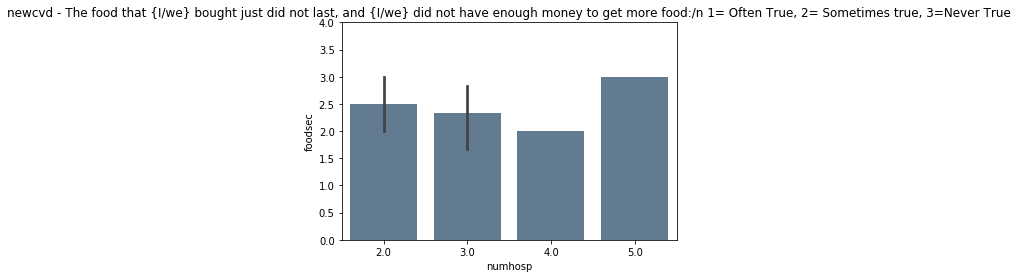

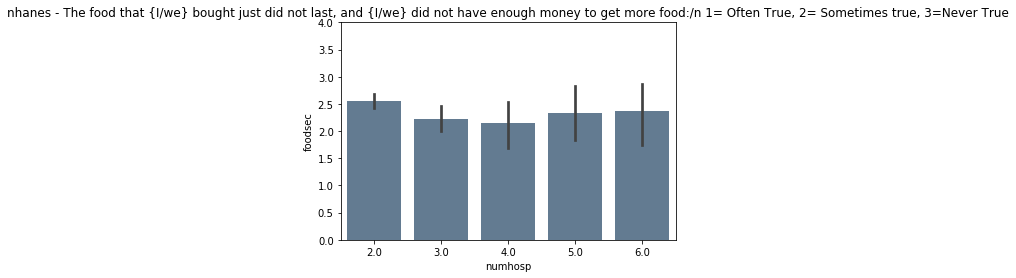

median foodsec for new cvd:  3.0
median foodsec score for nhanes:  3.0


In [44]:
color=sns.xkcd_rgb["slate blue"]

sns.barplot(data = cvd_over1, x='numhosp', y='foodsec', color=color)
plt.title('newcvd - The food that {I/we} bought just did not last, and {I/we} did not have enough money to get more food:/n 1= Often True, 2= Sometimes true, 3=Never True')
plt.ylim(0,4)
plt.show()
sns.barplot(data=nhanes_over1, x='numhosp', y='foodsec', color=color)
plt.title('nhanes - The food that {I/we} bought just did not last, and {I/we} did not have enough money to get more food:/n 1= Often True, 2= Sometimes true, 3=Never True')
plt.ylim(0,4)
plt.show()
print('median foodsec for new cvd: ', cvd_over1.foodsec.median())
print('median foodsec score for nhanes: ' , nhanes_over1.foodsec.median())


#### It does not appear that newcvd dataset are being affected by food availability compared with the general population (NHANES) that has also been admitted to the hospital in the year of the study. 
However, food security may be related to hospital readmission in a similar way in both datasets. A better analysis may examine overall NHANES dataset, including participants who had no hospitalizations, to the NHANES subset we have here (those who had 2 or more hospital admissions). 

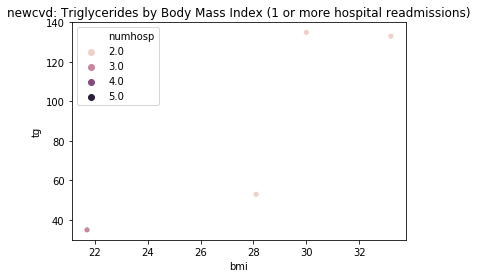

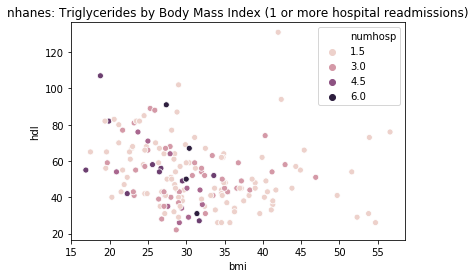

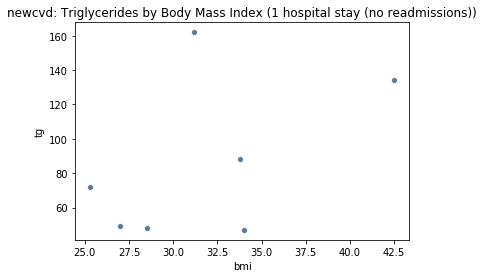

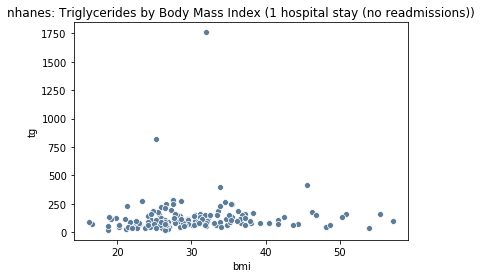

In [76]:
#create scatterplots looking at data for numhosp=1 and numhosp>1 for newcvd and nhanes
# age and blood labs/physical calcs, depr_score and blood labs/calcs,

cvd_over1 = newcvd.loc[newcvd.numhosp>1]
cvd1stay=newcvd.loc[newcvd.numhosp==1]
nhanes_over1=nhanes.loc[nhanes.numhosp>1]
nhanes1stay=nhanes.loc[nhanes.numhosp==1]

sns.scatterplot(data = cvd_over1, x='bmi', y='tg', color=color,hue='numhosp')
plt.title('newcvd: Triglycerides by Body Mass Index (1 or more hospital readmissions)')
plt.show()


sns.scatterplot(data = nhanes_over1, x='bmi', y='hdl', color=color, hue='numhosp')
plt.title('nhanes: Triglycerides by Body Mass Index (1 or more hospital readmissions)')
plt.show()


sns.scatterplot(data = cvd1stay, x='bmi', y='tg', color=color)
plt.title('newcvd: Triglycerides by Body Mass Index (1 hospital stay (no readmissions))')
plt.show()


plt.title('nhanes: Triglycerides by Body Mass Index (1 hospital stay (no readmissions))')
sns.scatterplot(data = nhanes1stay, x='bmi', y='tg', color=color)
plt.show()